In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

In [97]:
df = pd.read_csv("cksum.csv", error_bad_lines=False, header=None, usecols=[0,1])
df.head()

,0,1
0,delton.51056 > mba01s08-in-f3.1e100.net.ht...,cksum 0x021b (correct)
1,mba01s08-in-f3.1e100.net.https > delton.51...,cksum 0xd163 (correct)
2,delton.51056 > mba01s08-in-f3.1e100.net.ht...,cksum 0xfe02 (correct)
3,delton.51056 > mba01s08-in-f3.1e100.net.ht...,cksum 0x4338 (correct)
4,delton.51056 > mba01s08-in-f3.1e100.net.ht...,cksum 0xe35a (correct)


In [3]:
x = df.loc[0,1].split()[1]

In [4]:
x.encode("utf-8")

b'0x021b'

In [5]:
int(x,16)

539

In [6]:
int(0x021b)

539

In [98]:
df["value"] = df[1].apply(lambda x: x.split()[1]).apply(lambda x: int(x,16))
df = df.sample(len(df.index))
df.head()

,0,1,value
50729,mba01s08-in-f1.1e100.net.https > delton.49...,cksum 0xa27e (correct),41598
16689,mba01s08-in-f3.1e100.net.https > delton.51...,cksum 0x49b1 (correct),18865
65123,40.81.94.43.https > delton.45218: Flags [.],cksum 0x0942 (correct),2370
98296,delton.51575 > 185.162.184.34.52281: Flags...,cksum 0x3549 (correct),13641
97416,185.162.184.34.52281 > delton.51575: Flags...,cksum 0x070e (correct),1806


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146766 entries, 51386 to 102173
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       146766 non-null  object
 1   1       146766 non-null  object
 2   value   146766 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.5+ MB


In [88]:
df.head()

,0,1,value
51386,delton.55556 > mba01s07-in-f1.1e100.net.ht...,cksum 0xd166 (correct),53606
92097,delton.51575 > 185.162.184.34.52281: Flags...,cksum 0x1ed5 (correct),7893
46437,mba01s08-in-f5.1e100.net.https > delton.34...,cksum 0x1e13 (correct),7699
90965,185.162.184.34.52281 > delton.51575: Flags...,cksum 0xcfcb (correct),53195
124938,185.162.184.34.52281 > delton.51575: Flags...,cksum 0x2510 (correct),9488


In [10]:
df.loc[350,0]

'    delton.33558 > 162.159.153.4.https: Flags [.]'

In [102]:
import numpy as np
df["x"] = np.random.rand(len(df.index)) * 100000 * np.random.rand(len(df.index))
df["y"] = np.random.rand(len(df.index)) * 100000

In [70]:
np.random.rand(5)

array([0.53731792, 0.67178923, 0.04797675, 0.65001398, 0.89573407])

In [71]:
import matplotlib.pyplot as plt

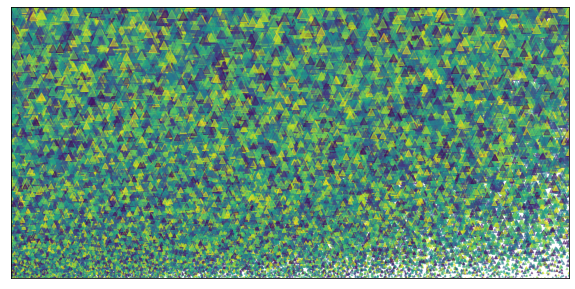

In [114]:
dfs = df.sample(len(df.index))

plt.figure(figsize=(10,5))

for i in list(dfs["value"].unique()):
    marker = np.random.choice(["x","o","<",">","^",","])

plt.xticks([])
plt.yticks([])

plt.xlim(1000,80000)
plt.ylim(1000,80000)
    
plt.scatter(dfs["x"], dfs["y"], marker=marker, c=dfs["value"], s=dfs["y"]/1e3, alpha=0.5)
plt.show();

In [ ]:
dfs = df.sample(len(df.index))

plt.figure(figsize=(10,5))

plt.xticks([])
plt.yticks([])

plt.xlim(1000,80000)
plt.ylim(1000,80000)

for i in list(dfs["value"].unique()):
    marker = np.random.choice(["x","o","<",">","^",","])
    plt.scatter(dfs["x"], dfs["y"], marker=marker, c=dfs["value"], s=dfs["y"]/1e3, alpha=0.5)
plt.show();